In [1]:
get_ipython().magic('matplotlib inline')
import matplotlib.pyplot as plt
import pandas as pd
from pandas.tools.plotting import scatter_matrix
import numpy as np
import seaborn as sns
import statistics as st
import re
pd.options.mode.chained_assignment = None  # default='warn'
df = pd.read_csv('Bengaluru_House_Data.csv')

In [2]:
def isfloat(value):
    try:
        float(value)
        return True
    except:
        return False

for index, row in df['size'].iteritems():
    x=df['size'].loc[index]
    if(not isfloat(x)):
        x=df['size'].loc[index].split(" ")
        df['size'].loc[index]=float(x[0])
    else:
        df['size'].loc[index]=float(df['size'].loc[index])

for index, row in df['availability'].iteritems():
    var = df['availability'].loc[index]
    if(var=='Ready To Move' or var=='Immediate Possession'):
        df['availability'].loc[index] = 'Ready To Move'    
    else:
        df['availability'].loc[index] = 'Not Ready To Move'

for index, row in df['bath'].iteritems():
    var = df['bath'].loc[index]
    if(var!=np.nan):
        df['bath'].loc[index] = float(var)
    else:
        df['bath'].fillna(round(np.median(df['bath'])))
        
for index, row in df['balcony'].iteritems():
    var = df['balcony'].loc[index]
    medianBalcony = np.nanmedian(df['balcony'])
    if(np.isnan(var)):
        df['balcony'].loc[index] = medianBalcony
    else:
        df['balcony'].loc[index] = float(var)

In [3]:
#cleaning total_sqft column
for index, row in df['total_sqft'].iteritems():
    var=df['total_sqft'].loc[index]
    if not isfloat(var):
        if "-" in var:
            val = var.split("-")
            sqft = float(val[0]) + float(val[1])
            sqft /= 2
        elif ("Guntha" or "guntha") in var:
            val = var.split("G")
            sqft = float(val[0])*1089.0
            
        elif ("Meter" or "meter") in var:
            val = var.split("S")
            sqft = float(val[0])*10.7639
            
        elif ("Ground" or "ground") in var:
            val = var.split("G")
            sqft = float(val[0])*2400.0
            
        elif ("Perch" or "perch") in var:
            val = var.split("P")
            sqft = float(val[0])*272.25
            
        elif ("Yard" or "yard") in var:
            val = var.split("S")
            sqft = float(val[0])*9.0
            
        elif ("Cents" or "cent") in var:
            val = var.split("C")
            sqft = float(val[0])*435.6
            
        elif ("Acre" or "acre") in var:
            val = var.split("A")
            sqft = float(val[0])*43560.0
    else:
        sqft = float(var)
        
    df['total_sqft'].loc[index] = float(sqft)


In [4]:
median = np.median(df['size'])
for index, row in df['size'].iteritems():
    var = df['size'].loc[index]
    if(np.isnan(var)):
        df['size'].loc[index] = median

C:\Users\parth\AppData\Roaming\Python\Python36\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Price in lakhs')

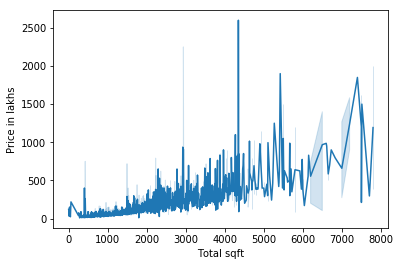

In [7]:
x=[]
y=[]
z=[]
w=[]
v=[]
for index, row in df['total_sqft'].iteritems():
    var = df['total_sqft'].loc[index]
    prc = df['price'].loc[index]
    siz = df['size'].loc[index]
    avi = df['availability'].loc[index]
    bat = df['bath'].loc[index]
    if(int(var)<8000 and int(siz)<10):
        x.append(var)
        y.append(prc)
        z.append(siz)
        w.append(avi)
        v.append(bat)
sns.lineplot(x,y);
plt.xlabel("Total sqft")
plt.ylabel("Price in lakhs")

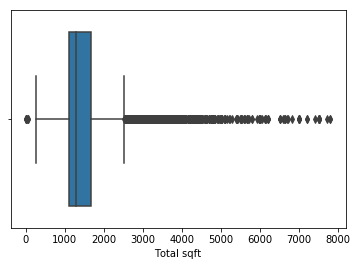

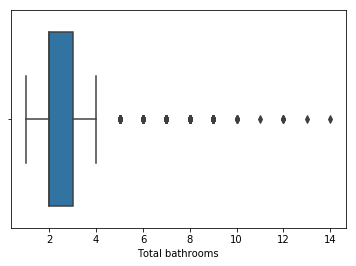

In [12]:
sns.boxplot(x)
plt.xlabel("Total sqft")
plt.show()
sns.boxplot(v)
plt.xlabel("Total bathrooms")
plt.show()

Text(0,0.5,'')

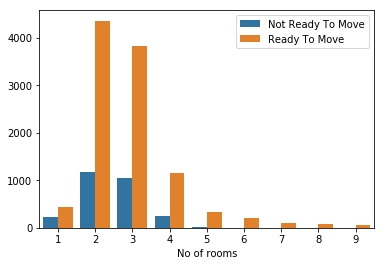

In [15]:
sns.countplot(z,hue=w)
plt.xlabel("No of rooms")
plt.ylabel("")

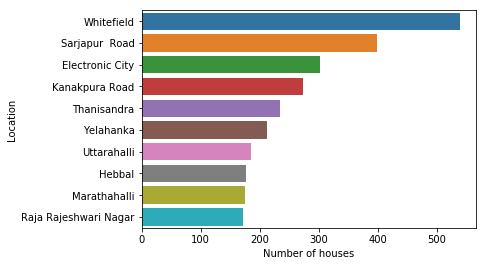

In [18]:
s={}  #dictionary to store number of homes in each location
x=[]  #top 10 locations
number=[]
for index, row in df['location'].iteritems():
    l = df['location'].loc[index]
    if(l not in s):
        s[l] = 1;
    else:
        s[l] += 1;
def findmax(s):
    max = 0
    maxloc = ""
    for i in s:
        if(s[i] > max):
            max = s[i]
            maxloc = i
    return maxloc,max
for i in range(0,10):
    x.append(findmax(s)[0])
    number.append(findmax(s)[1])
    del(s[findmax(s)[0]])
plt.ylabel("Location")
plt.xlabel("Number of houses")
sns.barplot(number, x, orient='h')
plt.show()

Text(0,0.5,'')

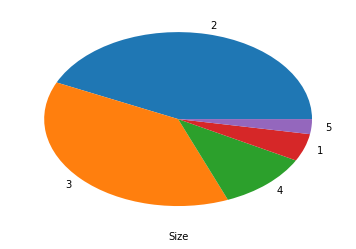

In [57]:
df['size'].value_counts().nlargest(5).plot(kind="pie")
plt.xlabel("Size")
plt.ylabel("")


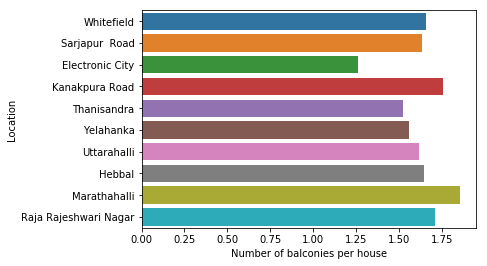

In [58]:
import operator
numberOfBalconies = {}
numberOfHouses = {}
loc=[]  #top 10 locations
div=[]
for index, row in df['location'].iteritems():
    l = df['location'].loc[index]
    if(l not in numberOfBalconies):
        numberOfBalconies[l] = df['balcony'].loc[index];
    else:
        numberOfBalconies[l] += df['balcony'].loc[index];
for index, row in df['location'].iteritems():
    l = df['location'].loc[index]
    if(l not in numberOfHouses):
        numberOfHouses[l] = 1;
    else:
        numberOfHouses[l] += 1;

for i in range(0, 10):
    locHouseNum = max(numberOfHouses.items(), key=operator.itemgetter(1))
    
    loc.append(locHouseNum[0])
    div.append(numberOfBalconies[locHouseNum[0]]/locHouseNum[1])
    
    del numberOfHouses[locHouseNum[0]]

plt.ylabel("Location")
plt.xlabel("Number of balconies per house")
sns.barplot(div, loc, orient='h')
plt.show()